In [1]:
from ultralytics import SAM
import torch
import tifffile as tf
import matplotlib.pyplot as plt
import numpy as np  
from skimage.metrics import structural_similarity as ssim  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Utilisation de: {device}")

Utilisation de: cuda


In [2]:
image = tf.imread('../data/Romane_Martin_urne_sature_10-4.tif')

In [3]:
print(image.shape)
print(image)

(1735, 1808, 1595)
[[[37 37 35 ... 37 37 37]
  [36 37 36 ... 37 37 36]
  [36 37 36 ... 36 36 36]
  ...
  [37 39 39 ... 39 38 37]
  [38 40 39 ... 38 38 38]
  [38 39 38 ... 38 38 37]]

 [[37 37 36 ... 37 37 36]
  [37 37 37 ... 37 36 36]
  [36 37 37 ... 36 36 36]
  ...
  [38 39 39 ... 38 37 37]
  [39 39 38 ... 39 38 37]
  [39 38 37 ... 39 39 38]]

 [[36 37 36 ... 37 37 36]
  [36 37 37 ... 37 35 35]
  [36 37 37 ... 37 36 36]
  ...
  [38 39 39 ... 38 36 36]
  [38 38 38 ... 39 38 36]
  [38 38 38 ... 39 39 37]]

 ...

 [[47 45 43 ... 42 42 41]
  [44 45 43 ... 42 40 40]
  [46 45 44 ... 39 39 41]
  ...
  [38 40 39 ... 35 34 35]
  [38 39 38 ... 39 33 35]
  [40 40 39 ... 41 37 34]]

 [[45 44 43 ... 42 43 40]
  [43 44 42 ... 41 39 40]
  [46 46 45 ... 39 40 42]
  ...
  [38 40 38 ... 35 35 37]
  [40 38 38 ... 37 33 37]
  [40 38 38 ... 41 35 33]]

 [[46 45 42 ... 42 43 41]
  [46 46 46 ... 43 41 41]
  [47 47 48 ... 42 42 43]
  ...
  [39 40 38 ... 37 34 35]
  [40 39 37 ... 39 36 35]
  [39 37 37 ... 41 

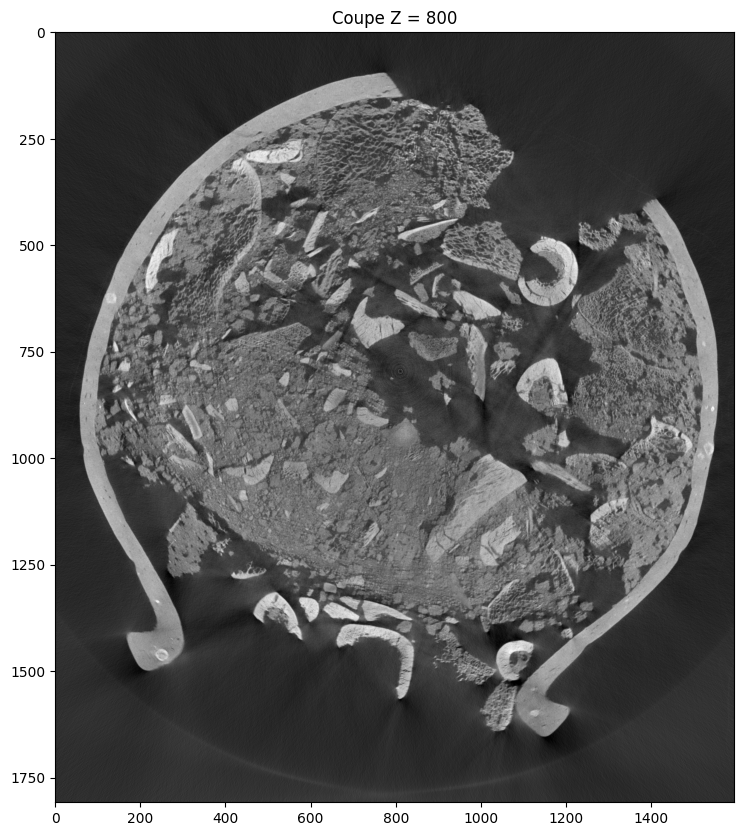

In [4]:
plt.figure(figsize=(12, 10))
plt.imshow(image[800, :, :],cmap='gray')
plt.title('Coupe Z = 800')
#plt.imsave('coupez800.png', image[800, :, :], cmap='gray')
plt.show()
slice_z = image[800, :, :]  # ← AJOUTER CETTE LIGNE

In [5]:
# Load a model
model = SAM("sam_b.pt")

# Display model information (optional)
model.info()

Model summary: 173 layers, 93,735,472 parameters, 93,735,472 gradients


(173, 93735472, 93735472, 0.0)

Analyse de 100 coupes (Z=400 à Z=499)

Traitement en cours...
  Coupe 400/499

image 1/1 /home/oelalaouiel/travail/funeria/FUNERIA-omar/notebooks/temp_slice.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 7817.7ms
Speed: 20.0ms preprocess, 7817.7ms inference, 5.5ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /home/oelalaouiel/travail/funeria/FUNERIA-omar/notebooks/temp_slice.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 6294.1ms
Speed: 4.4ms preprocess, 6294.1ms inference, 6.6ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /home/oelalaouiel/travail/funeria/FUNERIA-omar/notebooks/temp_slice.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 

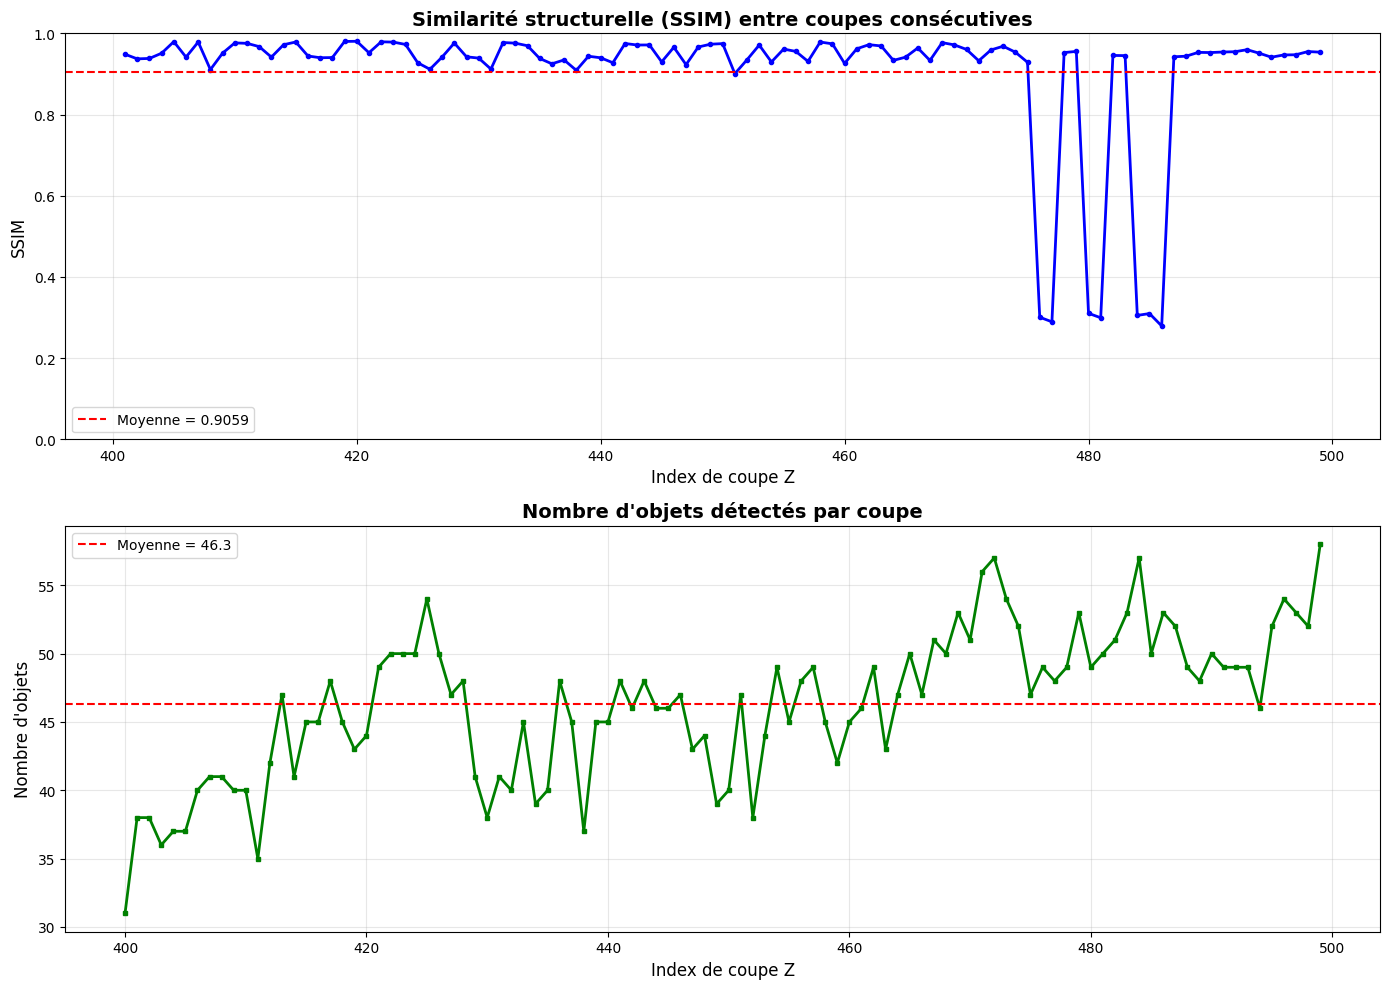


=== STATISTIQUES SSIM ===
SSIM moyen:     0.9059
SSIM min:       0.2791 (coupe Z=486)
SSIM max:       0.9804 (coupe Z=420)
Écart-type:     0.1685

=== STATISTIQUES OBJETS ===
Objets moyen:   46.3
Objets min:     31 (coupe Z=400)
Objets max:     58 (coupe Z=499)

⚠️  GRANDES VARIATIONS (SSIM < 0.95):
  Z=401: SSIM = 0.9485
  Z=402: SSIM = 0.9371
  Z=403: SSIM = 0.9381
  Z=406: SSIM = 0.9414
  Z=408: SSIM = 0.9107
  Z=413: SSIM = 0.9414
  Z=416: SSIM = 0.9442
  Z=417: SSIM = 0.9399
  Z=418: SSIM = 0.9403
  Z=425: SSIM = 0.9275

🎉 Analyse terminée!


In [6]:
# ============ Configuration ============
START_SLICE = 400
END_SLICE = 500
NUM_SLICES = END_SLICE - START_SLICE

print(f"Analyse de {NUM_SLICES} coupes (Z={START_SLICE} à Z={END_SLICE-1})")

# ============ Fonction pour extraire masque binaire ============
def get_binary_mask(model, image_slice):
    """
    Segmente une coupe et retourne l'image binaire (objets = 255, fond = 0)
    """
    # Sauvegarder temporairement (SAM nécessite un fichier)
    temp_file = "temp_slice.png"
    plt.imsave(temp_file, image_slice, cmap='gray')
    
    # Segmentation
    result = model(temp_file)
    
    # Extraire masques
    if result[0].masks is not None:
        masks = result[0].masks.data.cpu().numpy()
        
        # Créer masque combiné
        combined_mask = np.zeros(image_slice.shape, dtype=bool)
        for mask in masks:
            combined_mask = np.logical_or(combined_mask, mask)
        
        # Image binaire
        binary_image = np.zeros(image_slice.shape, dtype=np.uint8)
        binary_image[combined_mask] = 255
        
        return binary_image, len(masks)
    else:
        return np.zeros(image_slice.shape, dtype=np.uint8), 0

# ============ Traitement des coupes ============
ssim_values = []
num_objects_list = []

print("\nTraitement en cours...")

# Traiter la première coupe
prev_binary = None
for z in range(START_SLICE, END_SLICE):
    if z % 10 == 0:  # Afficher progression tous les 10
        print(f"  Coupe {z}/{END_SLICE-1}")
    
    current_slice = image[z, :, :]
    current_binary, num_objects = get_binary_mask(model, current_slice)
    num_objects_list.append(num_objects)
    
    # Calculer SSIM avec la coupe précédente
    if prev_binary is not None:
        ssim_value = ssim(prev_binary, current_binary, data_range=255)
        ssim_values.append(ssim_value)
    
    prev_binary = current_binary

print(f"\n✓ Traitement terminé!")

# ============ Nettoyage ============
import os
if os.path.exists("temp_slice.png"):
    os.remove("temp_slice.png")

# ============ Affichage des résultats ============
z_indices = np.arange(START_SLICE + 1, END_SLICE)

fig, axes = plt.subplots(2, 1, figsize=(14, 10))

# Plot 1: SSIM
axes[0].plot(z_indices, ssim_values, 'b-', linewidth=2, marker='o', markersize=3)
axes[0].axhline(y=np.mean(ssim_values), color='r', linestyle='--', 
                label=f'Moyenne = {np.mean(ssim_values):.4f}')
axes[0].set_xlabel('Index de coupe Z', fontsize=12)
axes[0].set_ylabel('SSIM', fontsize=12)
axes[0].set_title('Similarité structurelle (SSIM) entre coupes consécutives', fontsize=14, fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].legend()
axes[0].set_ylim([0, 1])

# Plot 2: Nombre d'objets détectés
z_all = np.arange(START_SLICE, END_SLICE)
axes[1].plot(z_all, num_objects_list, 'g-', linewidth=2, marker='s', markersize=3)
axes[1].axhline(y=np.mean(num_objects_list), color='r', linestyle='--', 
                label=f'Moyenne = {np.mean(num_objects_list):.1f}')
axes[1].set_xlabel('Index de coupe Z', fontsize=12)
axes[1].set_ylabel('Nombre d\'objets', fontsize=12)
axes[1].set_title('Nombre d\'objets détectés par coupe', fontsize=14, fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].legend()

plt.tight_layout()

# ============ SAUVEGARDER LES GRAPHIQUES ============
# Graphique combiné (2 plots)
output_file = f'ssim_analysis_Z{START_SLICE}-{END_SLICE}.png'
plt.savefig(output_file, dpi=300, bbox_inches='tight')
print(f"\n📊 Graphiques combinés sauvegardés: {output_file}")

# SSIM seul
fig_ssim, ax_ssim = plt.subplots(figsize=(14, 5))
ax_ssim.plot(z_indices, ssim_values, 'b-', linewidth=2, marker='o', markersize=3)
ax_ssim.axhline(y=np.mean(ssim_values), color='r', linestyle='--', 
                label=f'Moyenne = {np.mean(ssim_values):.4f}')
ax_ssim.set_xlabel('Index de coupe Z', fontsize=12)
ax_ssim.set_ylabel('SSIM', fontsize=12)
ax_ssim.set_title('Similarité structurelle (SSIM) entre coupes consécutives', fontsize=14, fontweight='bold')
ax_ssim.grid(True, alpha=0.3)
ax_ssim.legend()
ax_ssim.set_ylim([0, 1])
plt.tight_layout()
plt.savefig(f'ssim_only_Z{START_SLICE}-{END_SLICE}.png', dpi=300, bbox_inches='tight')
print(f"📈 SSIM seul sauvegardé: ssim_only_Z{START_SLICE}-{END_SLICE}.png")
plt.close(fig_ssim)

# Nombre d'objets seul
fig_obj, ax_obj = plt.subplots(figsize=(14, 5))
ax_obj.plot(z_all, num_objects_list, 'g-', linewidth=2, marker='s', markersize=3)
ax_obj.axhline(y=np.mean(num_objects_list), color='r', linestyle='--', 
               label=f'Moyenne = {np.mean(num_objects_list):.1f}')
ax_obj.set_xlabel('Index de coupe Z', fontsize=12)
ax_obj.set_ylabel('Nombre d\'objets', fontsize=12)
ax_obj.set_title('Nombre d\'objets détectés par coupe', fontsize=14, fontweight='bold')
ax_obj.grid(True, alpha=0.3)
ax_obj.legend()
plt.tight_layout()
plt.savefig(f'objects_count_Z{START_SLICE}-{END_SLICE}.png', dpi=300, bbox_inches='tight')
print(f"📊 Nombre d'objets seul sauvegardé: objects_count_Z{START_SLICE}-{END_SLICE}.png")
plt.close(fig_obj)

plt.show()

# ============ Statistiques ============
print("\n" + "="*50)
print("=== STATISTIQUES SSIM ===")
print("="*50)
print(f"SSIM moyen:     {np.mean(ssim_values):.4f}")
print(f"SSIM min:       {np.min(ssim_values):.4f} (coupe Z={z_indices[np.argmin(ssim_values)]})")
print(f"SSIM max:       {np.max(ssim_values):.4f} (coupe Z={z_indices[np.argmax(ssim_values)]})")
print(f"Écart-type:     {np.std(ssim_values):.4f}")

print("\n" + "="*50)
print("=== STATISTIQUES OBJETS ===")
print("="*50)
print(f"Objets moyen:   {np.mean(num_objects_list):.1f}")
print(f"Objets min:     {np.min(num_objects_list)} (coupe Z={z_all[np.argmin(num_objects_list)]})")
print(f"Objets max:     {np.max(num_objects_list)} (coupe Z={z_all[np.argmax(num_objects_list)]})")

# Identifier les grandes variations
threshold = 0.05
large_variations = np.where(np.array(ssim_values) < (1 - threshold))[0]
if len(large_variations) > 0:
    print("\n" + "="*50)
    print(f"⚠️  GRANDES VARIATIONS (SSIM < {1-threshold:.2f}):")
    print("="*50)
    for idx in large_variations[:10]:
        print(f"  Z={z_indices[idx]}: SSIM = {ssim_values[idx]:.4f}")

print("\n🎉 Analyse terminée!")


image 1/1 /home/oelalaouiel/travail/funeria/FUNERIA-omar/notebooks/temp_slice_799.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 6231.6ms
Speed: 15.1ms preprocess, 6231.6ms inference, 10.2ms postprocess per image at shape (1, 3, 1024, 1024)

image 1/1 /home/oelalaouiel/travail/funeria/FUNERIA-omar/notebooks/temp_slice_800.png: 1024x1024 1 0, 1 1, 1 2, 1 3, 1 4, 1 5, 1 6, 1 7, 1 8, 1 9, 1 10, 1 11, 1 12, 1 13, 1 14, 1 15, 1 16, 1 17, 1 18, 1 19, 1 20, 1 21, 1 22, 1 23, 1 24, 1 25, 1 26, 1 27, 1 28, 1 29, 1 30, 1 31, 1 32, 1 33, 1 34, 1 35, 1 36, 1 37, 1 38, 1 39, 1 40, 1 41, 1 42, 1 43, 1 44, 1 45, 1 46, 1 47, 1 48, 1 49, 1 50, 1 51, 1 52, 1 53, 1 54, 1 55, 1 56, 1 57, 1 58, 1 59

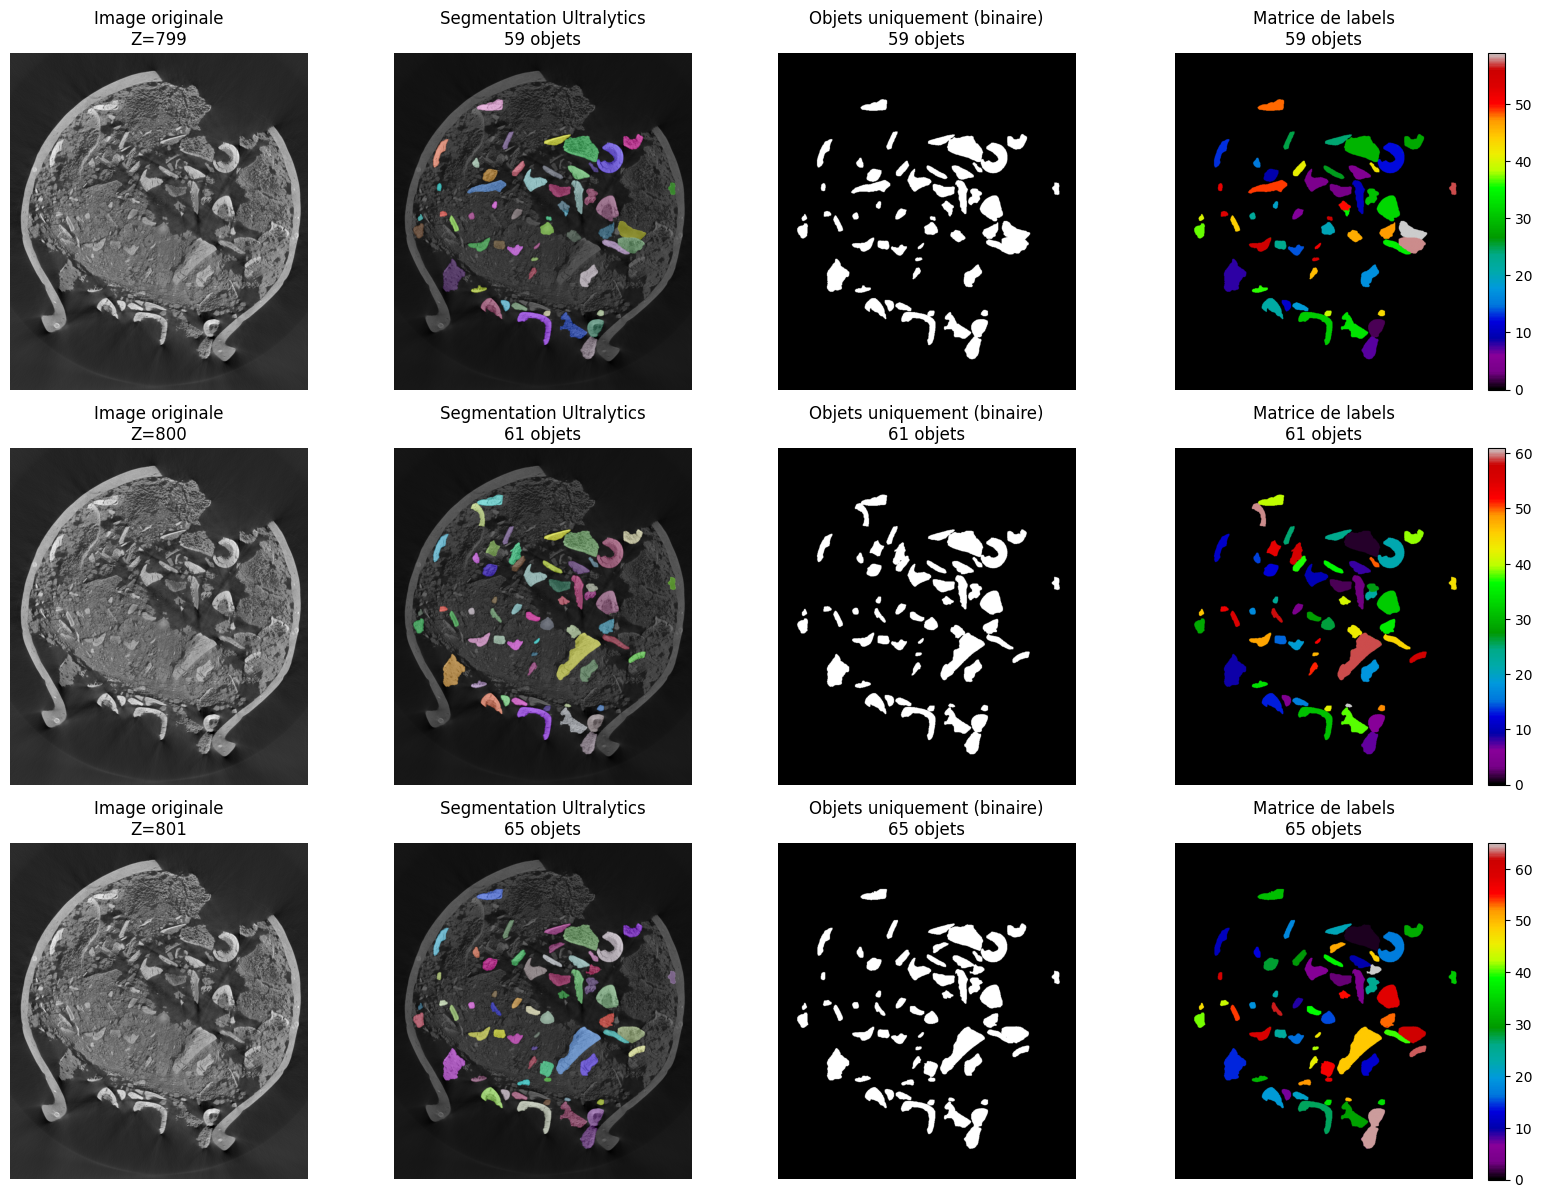

In [9]:
# ============ VISUALISATION DE TROIS COUPES SUCCESSIVES ============
Z_TO_SHOW = [799, 800, 801]
fig, axes = plt.subplots(len(Z_TO_SHOW), 4, figsize=(16, 4 * len(Z_TO_SHOW)))

for i, z in enumerate(Z_TO_SHOW):
    img = image[z, :, :]
    
    # Segmentation de la coupe
    temp_file = f"temp_slice_{z}.png"
    plt.imsave(temp_file, img, cmap='gray')
    result = model(temp_file)
    
    # Extraction des masques
    if result[0].masks is not None:
        masks = result[0].masks.data.cpu().numpy()
        combined_mask = np.zeros(img.shape, dtype=bool)
        for mask in masks:
            combined_mask |= mask
        
        binary_image = np.zeros(img.shape, dtype=np.uint8)
        binary_image[combined_mask] = 255
        
        labeled_image = np.zeros(img.shape, dtype=np.int32)
        
        # Créer l'overlay coloré pour la segmentation
        overlay = np.zeros((*img.shape, 3), dtype=np.uint8)
        np.random.seed(42)  # Pour des couleurs reproductibles
        
        for label_id, mask in enumerate(masks, start=1):
            labeled_image[mask] = label_id
            # Générer une couleur aléatoire pour chaque objet
            color = np.random.randint(0, 255, 3)
            overlay[mask] = color
    else:
        binary_image = np.zeros(img.shape, dtype=np.uint8)
        labeled_image = np.zeros(img.shape, dtype=np.int32)
        masks = []
        overlay = np.zeros((*img.shape, 3), dtype=np.uint8)
    
    # Affichage
    ax_row = axes[i] if len(Z_TO_SHOW) > 1 else axes
    
    # 1️⃣ Image originale
    ax_row[0].imshow(img, cmap='gray')
    ax_row[0].set_title(f"Image originale\nZ={z}")
    ax_row[0].axis("off")
    
    # 2️⃣ Segmentation Ultralytics (SEULEMENT l'overlay sur l'image)
    ax_row[1].imshow(img, cmap='gray')
    if overlay.sum() > 0:  # Si des objets ont été détectés
        ax_row[1].imshow(overlay, alpha=0.5)
    ax_row[1].set_title(f"Segmentation Ultralytics\n{len(masks)} objets")
    ax_row[1].axis("off")
    
    # 3️⃣ Objets uniquement (binaire)
    ax_row[2].imshow(binary_image, cmap='gray')
    ax_row[2].set_title(f"Objets uniquement (binaire)\n{len(masks)} objets")
    ax_row[2].axis("off")
    
    # 4️⃣ Matrice de labels
    im = ax_row[3].imshow(labeled_image, cmap='nipy_spectral')
    ax_row[3].set_title(f"Matrice de labels\n{len(masks)} objets")
    ax_row[3].axis("off")
    fig.colorbar(im, ax=ax_row[3], fraction=0.046, pad=0.04)
    
    # Nettoyer le fichier temporaire
    os.remove(temp_file)

plt.tight_layout()
plt.show()